### DTW Samples Similarity

Analyzes the DTW distance between samples of the same class and samples of different classes in the real and synthetic dataset.

The goal is to understand whether or not the model is failing due to mode collapse.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf

import numpy as np
from scipy.spatial.distance import euclidean

from fastdtw import fastdtw 
tf.enable_eager_execution()

/home/malzantot/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from syn_dataset import SynDataset
from adl_dataset import ADLDataset

In [4]:
batch_size = 100


def get_distances(batch_x, batch_y):
    batch_size = batch_x.shape[0]
    d_intra = []
    d_inter = []
    for i in range(batch_size):
        for j in range(batch_size):
            if i == j:
                continue
            d, path = fastdtw(batch_x[i], batch_x[j], dist=euclidean)
            if (batch_y[i] == batch_y[j]):
                d_intra.append(d)
            else:
                d_inter.append(d)
    return d_intra, d_inter


In [6]:
real_set = ADLDataset(ds_root='dataset/adl/', is_train=False)
real_set = real_set.to_dataset().shuffle(batch_size).batch(batch_size)
real_batch_x, real_batch_y = next(iter(real_set))
real_batch_x = real_batch_x.numpy()
real_batch_y = real_batch_y.numpy()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([ 1, 29, 10, 11, 23, 29, 21, 25, 24]))


In [7]:
syn_set = SynDataset('samples/adl_crnn/06_25_09_43', None)
syn_set = syn_set.to_dataset().shuffle(1000).batch(batch_size)

In [8]:
syn_batch_x, syn_batch_y = next(iter(syn_set))
syn_batch_x = syn_batch_x.numpy()
syn_batch_y = syn_batch_y.numpy()

In [9]:
real_d_intra, real_d_inter = get_distances(real_batch_x, real_batch_y)
syn_d_intra, syn_d_inter = get_distances(syn_batch_x, syn_batch_y)

## Distances within Real dataset

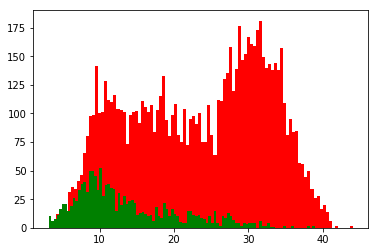

In [10]:
plt.hist(real_d_inter, color='red',bins=100)
plt.hist(real_d_intra, color='green',bins=100)
None

## Distances within Synthetic dataset

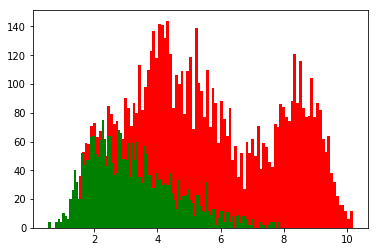

In [11]:
plt.hist(syn_d_inter, color='red',bins=100)
plt.hist(syn_d_intra, color='green', bins=100)
None

In [32]:
## The 
syn_set = SynDataset('samples/combined2', None)
syn_set = syn_set.to_dataset().shuffle(1000).batch(100)
syn_batch_x, syn_batch_y = next(iter(syn_set))
syn_batch_x = syn_batch_x.numpy()
syn_batch_y = syn_batch_y.numpy()
syn_d_intra, syn_d_inter = get_distances(syn_batch_x, syn_batch_y)

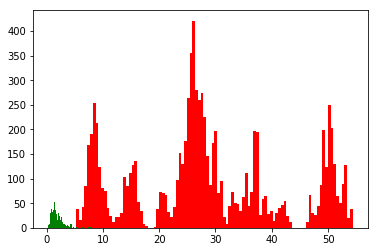

In [33]:
plt.hist(syn_d_inter, color='red',bins=100)
plt.hist(syn_d_intra, color='green', bins=100)
None